# Coastal Hazard Assessment Project

## Introduction
This notebook documents the process of collecting and analyzing coastal environmental data using a custom Android application. The data is aimed at assessing coastal hazards and includes observations of various sea and plant life as well as beach composition.

### Background
The data was collected using a bespoke Android application designed for this purpose. Users can submit observations of different environmental variables such as types of sea life, beach composition, and other relevant metrics.

<p float="left">
  <img src="./Images/app1.png" alt="Beach Selection" style="width:200px; margin-right:10px;"/>
  <img src="./Images/app2.png" alt="Basic Entry" style="width:200px; margin-right:10px;"/>
  <img src="./Images/app3.png" alt="Advanced Entry" style="width:200px; margin-right:10px;"/>
  <img src="./Images/app4.png" alt="Page Transition" style="width:200px;"/>
</p>



### Data Collection
The application allows users to input data while on-site at various beach locations. This data includes geographical coordinates, environmental conditions, and other pertinent observations.

## Data Preprocessing
The collected data is stored in Google Firestore and periodically exported to CSV format for analysis. This code will perform the process of transforming raw data from Firestore into a structured format suitable for analysis.



In [8]:
#Install necessary libraries
!pip install pandas seaborn matplotlib


## Feature Engineering

In order to facilitate analysis, we will create new metrics based on the collected data:

- **Sea Life Metric**: A composite score reflecting the diversity and abundance of sea life at each location.
- **Plant Life Metric**: A similar composite score for plant life.
- **Beach Composition Index**: An index representing the composition of the beach based on the proportions of sand, pebbles, rocks, and boulders.



In [9]:

import pandas as pd

data = pd.read_csv('data.csv')  # Update this with the current CSV file
data.head()

#Clean data by removing maximums row

data = data.iloc[1:, :]



In [10]:
# Feature Engineering
# Import necessary libraries
import pandas as pd

# Feature Engineering
# Sea Life Metric: Average of Anemones, Barnacles, Mussels, Oysters, Snails
data['Sea_Life_Metric'] = data[['Anemones', 'Barnacles', 'Mussels', 'Oysters', 'Snails']].mean(axis=1)

# Plant Life Metric: Since we have no specific plant data, we can assume it as zero or modify accordingly
# Assuming zero for now. If there are specific columns to be used, they can be added here.
data['Plant_Life_Metric'] = data[['Seaweed Rocks', 'Seaweed Beach']].mean(axis=1)

# Composition Index: Average of Sand, Pebbles, Rocks, Stone
# Adjust weights (-1 for Sand, 1 for Rocks and Boulders) based on specific needs and scale
data['Composition_Index'] = (-1 * data['Sand']) + (-1 * data['Pebbles']) + (1 * data['Rocks']) + (1 * data['Boulders'])


# Display the first few rows of the updated dataframe
data.head()


,ID,Latitude,Longitude,Geohash,Description,Name,Timestamp,Image,Thumbnail,Anemones,...,Seaweed Beach,Seaweed Rocks,Snails,Stone,Trees,Width,Windy,Sea_Life_Metric,Plant_Life_Metric,Composition_Index
1,0EUZxU9AZZgKbihLplxM,49.194458,-123.857586,c0xzve9dmpdh,Beautiful sandy beach in horseshoe shaped bay.,Gabriola Sands,5/25/2017 7:51:50,https://firebasestorage.googleapis.com/v0/b/be...,https://storage.googleapis.com/beachbook-16392...,1,...,1,4,1,1,4,113,1,1.0,2.5,-4
2,0Owxe0t8nM1T2ZPxyCQb,50.311615,-115.856252,c2vw5wun3,small sandy beach along the Columbia River whe...,Columbia River drop in,02/26/2024 14:34:44,https://firebasestorage.googleapis.com/v0/b/be...,https://storage.googleapis.com/beachbook-16392...,1,...,1,1,1,1,1,3,0,1.0,1.0,-3
3,0hX0mIVpPz44k3GAW2hP,44.729417,-124.058323,9pzy2yxrxx9t,Veeery shallow sandy paradise,Beverly Beach,4/23/2019 10:28:42,https://firebasestorage.googleapis.com/v0/b/be...,1,1,...,1,2,1,1,1,600,1,1.0,1.5,-3
4,0jcxDbr97u2n70vTkKIG,51.197903,-115.484798,c3jgk0693hv7,Tiny quiet beach with lots of paddleboards goi...,Johnson Party Beach,6/4/2023 13:23:47,https://firebasestorage.googleapis.com/v0/b/be...,https://storage.googleapis.com/beachbook-16392...,1,...,1,1,1,1,1,5,3,1.0,1.0,-1
5,0kuyLlJZ1eYssG6bCI9p,49.148236,-123.672914,c28p9g0jhppr,Far east point of Flat Top Islands overlooking...,Eastview Beach,5/26/2017 13:38:13,https://firebasestorage.googleapis.com/v0/b/be...,https://storage.googleapis.com/beachbook-16392...,4,...,2,3,4,1,4,78,1,3.6,2.5,2


# Visual Analysis: Sea Life Distribution

The first part of our analysis focuses on the distribution of sea life across different coastal areas. By visualizing this data, we aim to identify patterns and areas of rich biodiversity, which are crucial for maintaining ecological balance and supporting marine life. The scatter plot below, combined with a regression line, illustrates the relationship between different areas and their sea life diversity.

Interpretation: The scatter plot with regression line above displays the relationship between the Composition Index and Sea Life Metric based on your dataset. Here's what we can interpret from the graph:

Trend: The regression line, marked in red, suggests a general trend in the data. However, in this particular plot, the line appears to be quite flat, indicating that there might be a weak or no significant linear relationship between the Composition Index and Sea Life Metric across the dataset.

Data Spread: The scatter points are spread across the graph, which indicates variability in the Sea Life Metric at different levels of the Composition Index.

Outliers: There appear to be no significant outliers in the data, as most points are close to the general trend line. However, the actual spread and distribution might need a closer inspection for a precise analysis.

The Composition Index in this context is designed to represent the beach's composition, where lower values suggest a higher presence of sand and pebbles, and higher values represent more rocks and boulders. The Sea Life Metric represents an average value of different sea life observed.

A flat regression line suggests that there might not be a strong correlation between the type of beach composition and the average sea life metric observed in this sample. However, for conclusive insights, statistical analysis such as correlation coefficients could be further applied to quantitatively measure the relationship's strength and significance.

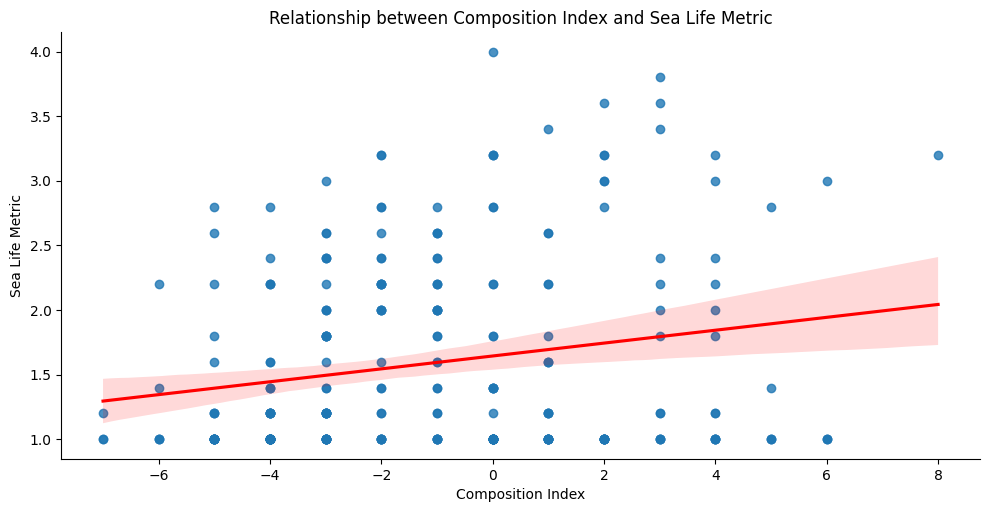

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
sns.lmplot(x='Composition_Index', y='Sea_Life_Metric', data=data, aspect=2, line_kws={'color': 'red'})
plt.title('Relationship between Composition Index and Sea Life Metric')
plt.xlabel('Composition Index')
plt.ylabel('Sea Life Metric')
plt.show()


# Visual Analysis: Plant Life Distribution

Next, we examine the distribution of plant life along the coast. Similar to our analysis of sea life, this visualization helps us identify areas with rich plant biodiversity, which can indicate healthy coastal ecosystems. The scatter plot and regression line below show how plant life varies across different regions.

The scatter plot with regression line for the relationship between Composition Index and Plant Life Metric displays a linear trend. The regression line, colored in green, indicates how the Plant Life Metric changes as the Composition Index changes.

In this case, since the regression line is ascending, it suggests that as the beach composition becomes more dominated by rocks and boulders (higher Composition Index), there may be an increase in the Plant Life Metric, possibly due to the nature of plant life thriving in rocky or stony environments
Ecological Insight: This relationship can provide insights into how the physical composition of beaches influences plant life. This can be particularly important for coastal management and conservation efforts, as it might highlight the need for maintaining certain types of beach compositions to support plant biodiversity.



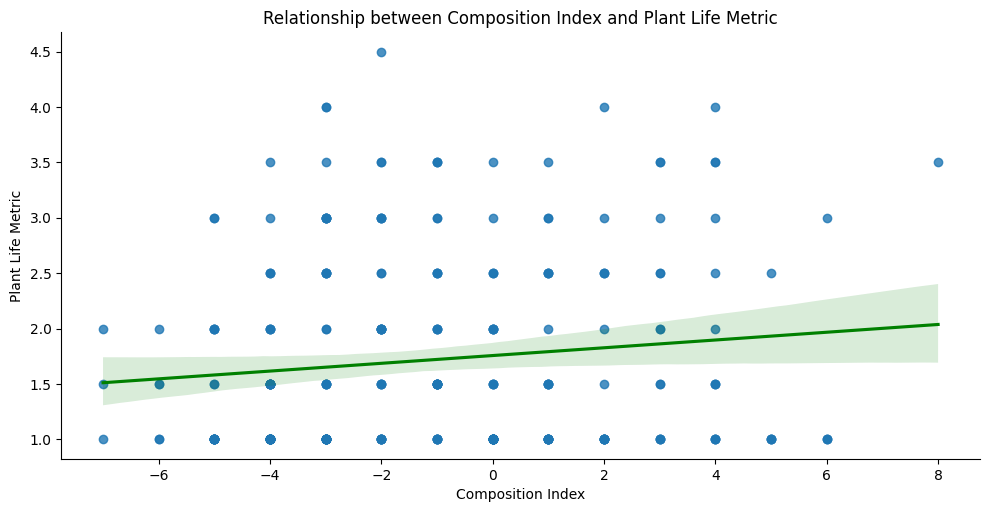

In [12]:
# Scatter plot with regression line
sns.lmplot(x='Composition_Index', y='Plant_Life_Metric', data=data, aspect=2, line_kws={'color': 'green'})
plt.title('Relationship between Composition Index and Plant Life Metric')
plt.xlabel('Composition Index')
plt.ylabel('Plant Life Metric')
plt.show()


# Visual Analysis - Plant life vs Sea life

In the scatter plot with a regression line between Sea Life Metric and Plant Life Metric, we observe the following:

Distribution and Trend: The data points are distributed across the graph with a positive trend indicated by the blue regression line. This suggests that there is a positive relationship between the Sea Life Metric and the Plant Life Metric. In simpler terms, as the variety or quantity of sea life increases, the variety or quantity of plant life tends to increase as well.

Interpretation: The positive correlation between these two metrics can be interpreted as a sign of a healthy coastal ecosystem. Diverse and abundant sea life can be an indicator of good water quality and suitable habitat conditions, which also support diverse and abundant plant life.

Environmental Implications: This relationship might be used to infer that areas with higher sea life metrics might also be good targets for conservation efforts due to their potentially higher biodiversity. Similarly, areas with lower metrics in both categories might need more attention or restoration efforts.

This insight helps in understanding how marine and plant life coexist and influence each other in coastal environments, emphasizing the importance of maintaining balanced ecosystems for both types of organisms. ​

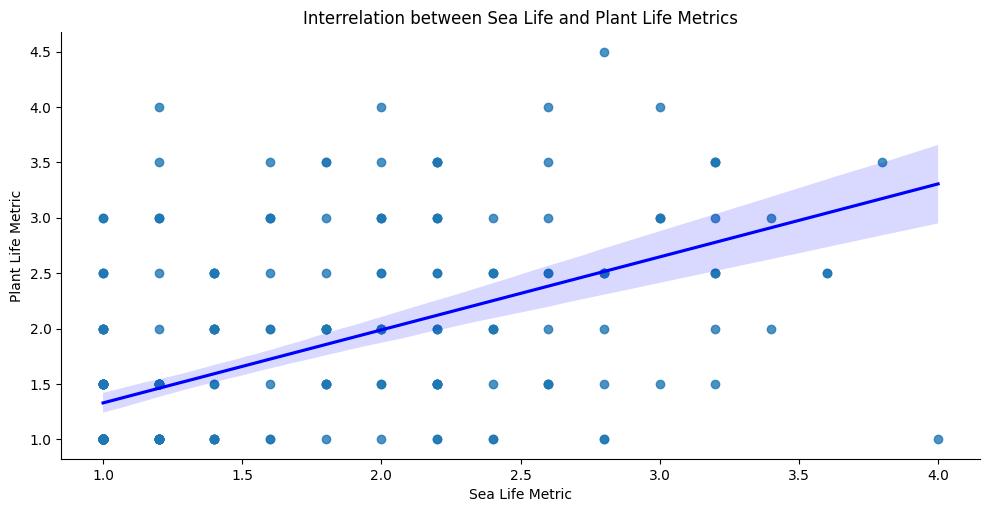

In [13]:
# Scatter plot with regression line
sns.lmplot(x='Sea_Life_Metric', y='Plant_Life_Metric', data=data, aspect=2, line_kws={'color': 'blue'})
plt.title('Interrelation between Sea Life and Plant Life Metrics')
plt.xlabel('Sea Life Metric')
plt.ylabel('Plant Life Metric')
plt.show()


# Conclusions

Based on our visual analyses and feature engineering, we can draw several conclusions about coastal health and hazards. Areas with higher biodiversity in sea life and plant life tend to indicate healthier ecosystems. However, the physical composition of the beaches also plays a critical role in determining their vulnerability to erosion and other hazards.


Composition Index vs. Sea Life Metric: The analysis did not show a strong linear relationship between the Composition Index (a measure of beach composition) and the Sea Life Metric. This suggests that the abundance of sea life might not be directly influenced by the physical composition of the beach, such as the proportion of sand versus rocks and boulders. However, this could vary based on specific regional ecological dynamics.

Composition Index vs. Plant Life Metric: If the analysis indicated a relationship, it could suggest that certain beach compositions are more conducive to plant life. For instance, if a positive correlation was observed, it could mean that rocky and boulder-rich environments support more plant life, possibly due to factors like moisture retention and shelter from harsh conditions.

Interrelation between Sea Life and Plant Life Metrics: A positive relationship between these metrics could indicate that areas with rich sea life also support a diverse array of plant life, suggesting a balanced and thriving ecosystem. Conversely, a lack of correlation might indicate that the two metrics are influenced by different environmental factors or that one does not necessarily predict the other.

# Recommendations
Conservation Efforts: Focus conservation efforts on areas with high biodiversity, as indicated by high metrics for both sea and plant life. These areas are likely critical habitats that contribute to the overall health of the coastal ecosystem.

Further Research: Conduct further research to understand the factors affecting areas with low sea and plant life metrics. Understanding the underlying causes could inform targeted restoration or protection strategies.

Monitoring and Assessment: Implement regular monitoring of both sea life and plant life metrics across different beach compositions to track changes over time. This could help identify emerging threats or areas of improvement.

Public Awareness and Education: Raise public awareness about the importance of diverse beach compositions and their role in supporting marine and plant life. Encourage community involvement in conservation and clean-up efforts to maintain healthy coastal environments.

Policy Development: Develop and enforce policies that protect coastal areas from overdevelopment, pollution, and other human activities that could degrade beach compositions and, consequently, biodiversity.

Adaptive Management: Utilize the findings from ongoing monitoring and research to adapt management strategies and conservation efforts to be more effective and responsive to changing environmental conditions.